In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("DREAM_data.txt",delimiter='\t',engine='python',index_col=0)
df.to_csv

<bound method NDFrame.to_csv of                             184B5    600MPE     AU565      BT20     BT474  \
HGNC_ID                                                                     
Everolimus(mTOR)         0.000000  0.000000       NaN       NaN  1.000000   
Disulfiram(ALDH2)        0.000000  1.000000  1.000000  1.000000  0.000000   
Methylglyoxol(Pyruvate)       NaN  0.000000  1.000000       NaN  1.000000   
Mebendazole(Tubulin)          NaN  0.000000  1.000000  0.000000  1.000000   
4-HC(DNA alkylator)           NaN  0.000000  1.000000  1.000000  0.000000   
...                           ...       ...       ...       ...       ...   
PIK3IP1                  5.094983  5.838762  5.259975  4.581164  6.680903   
SNRPD2                   8.347877  8.134302  8.465382  8.861059  8.264550   
SLC39A6                  9.560331  9.230374  8.702158  6.829949  9.895278   
CTSC                     8.014001  5.489988  6.926434  6.706568  4.959705   
AQP7                     5.611784  5.135123 

In [3]:
drug_sens_df=df.iloc[0:5]
drug_sens_df

,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,HCC202,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
HGNC_ID,,,,,,,,,,,,,,,,,,,,,
Everolimus(mTOR),0.0,0.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,NaN,...,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0
Disulfiram(ALDH2),0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,...,0.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,0.0
Methylglyoxol(Pyruvate),NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,1.0,1.0
Mebendazole(Tubulin),NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4-HC(DNA alkylator),NaN,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0


In [4]:
gene_express_df= df.iloc[5:]
gene_express_df=gene_express_df.T
gene_express_df.head()

HGNC_ID,C9orf152,ELMO2,RPS11,CREB3L1,PNMA1,MMP2,C10orf90,ERCC5,ZHX3,GPR98,...,GRIP2,GOLGA8B,GPLD1,RAB8A,RXFP2,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
184B5,3.613030,7.205940,10.476276,5.565989,7.664038,5.108659,4.128089,7.263226,5.742329,3.671584,...,6.164306,4.648155,3.741650,8.103385,3.035962,5.094983,8.347877,9.560331,8.014001,5.611784
600MPE,8.463736,7.959597,9.939852,9.835957,7.645439,4.611590,3.687597,7.450175,5.199320,5.755408,...,5.716731,5.082299,3.848673,9.345093,3.042711,5.838762,8.134302,9.230374,5.489988,5.135123
AU565,7.935823,8.073369,9.817430,5.696639,7.761882,4.765150,3.883901,7.204121,5.477589,6.198794,...,6.133836,4.844242,4.605217,9.343916,2.862658,5.259975,8.465382,8.702158,6.926434,5.309263
BT20,3.098928,8.164778,10.038500,4.972852,7.766212,4.657057,3.848230,7.758748,5.764572,3.560379,...,5.777977,5.019017,3.948915,9.465953,2.781718,4.581164,8.861059,6.829949,6.706568,5.232824
BT474,9.010836,8.120015,9.533423,8.155372,8.393242,4.584473,3.667176,6.542780,4.882232,4.810989,...,5.780276,5.151477,4.066432,8.841824,2.879156,6.680903,8.264550,9.895278,4.959705,5.212809


In [5]:
drugs=[0,0,0,0,0]

In [6]:
#target array---delete the Na value for drug1---Everolimus: 
Everolimus_sens=df.iloc[0]
Everolimus_sens.transpose()
Everolimus_sens= Everolimus_sens[~np.isnan(Everolimus_sens)]
list_cell_line=Everolimus_sens.index.tolist()
drug1_celllines=list_cell_line
drug1=Everolimus_sens.to_dict()
drugs[0]= drug1

In [7]:
#target array---delete the Na value for drug2---Disulfiram: 
Disulfiram_sens=df.iloc[1]
Disulfiram_sens.transpose()
Disulfiram_sens= Disulfiram_sens[~np.isnan(Disulfiram_sens)]
drug2=Disulfiram_sens.to_dict()
drugs[1]= drug2

In [8]:
#target array---delete the Na value for drug3---Methylglyoxol: 
Methylglyoxol_sens=df.iloc[2]
Methylglyoxol_sens.transpose()
Methylglyoxol_sens= Methylglyoxol_sens[~np.isnan(Methylglyoxol_sens)]
drug3=Methylglyoxol_sens.to_dict()
drugs[2]= drug3

In [9]:
#target array---delete the Na value for drug4---Mebendazole: 
Mebendazole_sens=df.iloc[3]
Mebendazole_sens.transpose()
Mebendazole_sens= Mebendazole_sens[~np.isnan(Mebendazole_sens)]
drug4=Mebendazole_sens.to_dict()
drugs[3]= drug4

In [10]:
#target array---delete the Na value for drug5---4-HC: 
drug5_sens=df.iloc[4]
drug5_sens.transpose()
drug5_sens=drug5_sens[~np.isnan(drug5_sens)]
drug5=drug5_sens.to_dict()
drugs[4]= drug5
drugs
drug_sens_df

,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,HCC202,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
HGNC_ID,,,,,,,,,,,,,,,,,,,,,
Everolimus(mTOR),0.0,0.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,NaN,...,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0
Disulfiram(ALDH2),0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,...,0.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,0.0
Methylglyoxol(Pyruvate),NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,1.0,1.0
Mebendazole(Tubulin),NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4-HC(DNA alkylator),NaN,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0


In [11]:
#gene_express_profiles[drug1,drug2,drug3,drug4,drug5]---delect the NA value

gene_express_profiles=[0]*5
features_drugs=[0]*5

for i in range(len(drugs)):

    gene_express_df_curr=gene_express_df.loc[gene_express_df.index.isin(drugs[i].keys())]

        # create a list stores gene express profiles
    gene_express_profiles[i]= gene_express_df_curr.T.to_dict()
    
    features_drugs[i]=gene_express_df_curr.to_dict(orient="records")

    for key in gene_express_profiles[i]:
       gene_express_profiles[i][key]=list(gene_express_profiles[i][key].values())


In [12]:
#question2 --- kNN performance evaluation(k=5)

In [13]:
from scipy.stats import pearsonr


def similariy(c1,c2):
    corr,p_value= pearsonr(c1,c2)
    return corr


# GET THE TOP K NEAREST VALUES FOR A CELL LINE
def get_topK(target_name,cell_lines_dict,k=5):
    # return the property of the cell line to be predict
    predict_gene_profile= cell_lines_dict[target_name]

    similarities=[]
    for curr in cell_lines_dict:
        if curr!= target_name:
            # return a tuple(corr, cell_line's name)
            similarities.append((similariy(predict_gene_profile,cell_lines_dict[curr]),curr))
    #  example:
    #  [(0.932900785217343, 'UACC812'),
    #  (0.9300574550225753, 'HCC1428'),
    #  (0.9287809762976655, 'CAMA1'),
    #  (0.9286119024092296, 'MCF7'),
    #  (0.9283439521906872, 'BT474')]

    topK=sorted(similarities,reverse=True)[:k]
    return topK

#k=5
score_drugs=[0]*5

true_labels=[0]*5


for i in range(len(drugs)):
    # predict curr drug 
    score=[0]*len(drugs[i].keys())
    #curr: '184B5','600MPE','BT474','BT483',
    index=0
    for curr_cell in drugs[i].keys():
        for corr, curr_cell_line in get_topK(curr_cell,gene_express_profiles[i]):
            if drugs[i][curr_cell_line]==1:
                score[index]+=1
        index+=1
        

    score_drugs[i]=[]
    for curr in score:
            score_drugs[i].append(curr/5)
    # score_drug1 - prediction of drug1

    #first drug - label
    true_labels[i]=list(drugs[i].values())


In [14]:
#k=3
score_drugs2=[0]*5

true_labels=[0]*5


for i in range(len(drugs)):
    # predict curr drug 
    score=[0]*len(drugs[i].keys())
    #curr: '184B5','600MPE','BT474','BT483',
    index=0
    for curr_cell in drugs[i].keys():
        for corr, curr_cell_line in get_topK(curr_cell,gene_express_profiles[i],k=3):
            if drugs[i][curr_cell_line]==1:
                score[index]+=1
        index+=1
        

    score_drugs2[i]=[]
    for curr in score:
            score_drugs2[i].append(curr/5)
    # score_drug1 - prediction of drug1

    #first drug - label
    true_labels[i]=list(drugs[i].values())


In [15]:
#k=7
score_drugs3=[0]*5

true_labels=[0]*5


for i in range(len(drugs)):
    # predict curr drug 
    score=[0]*len(drugs[i].keys())
    #curr: '184B5','600MPE','BT474','BT483',
    index=0
    for curr_cell in drugs[i].keys():
        for corr, curr_cell_line in get_topK(curr_cell,gene_express_profiles[i],k=7):
            if drugs[i][curr_cell_line]==1:
                score[index]+=1
        index+=1
        

    score_drugs3[i]=[]
    for curr in score:
            score_drugs3[i].append(curr/5)
    # score_drug1 - prediction of drug1

    #first drug - label
    true_labels[i]=list(drugs[i].values())

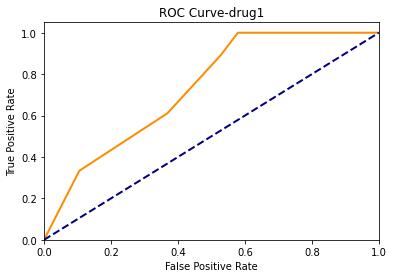

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.DataFrame({'true_label': true_labels[0],
                   'pred_prob': score_drugs[0]})


#initial:
tpr = 0.0
fpr = np.linspace(0, 1, 101)




def ROC(y_true, y_predict):
    # Calculate TPR and FPR at different thresholds
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predict)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    
     
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve-drug1')
    plt.show()
    
ROC(df["true_label"],df["pred_prob"])

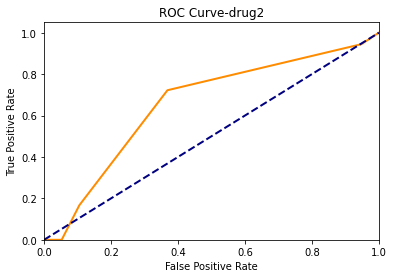

In [34]:
df = pd.DataFrame({'true_label': true_labels[1],
                   'pred_prob': score_drugs[1]})


#initial:
tpr = 0.0
fpr = np.linspace(0, 1, 101)




def ROC(y_true, y_predict):
    # Calculate TPR and FPR at different thresholds
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predict)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    
     
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve-drug2')
    plt.show()
    
ROC(df["true_label"],df["pred_prob"])

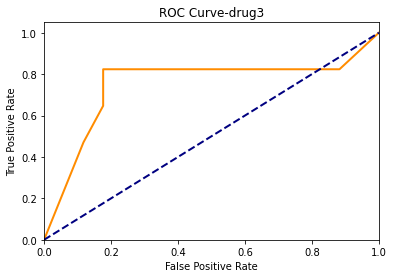

In [16]:
df = pd.DataFrame({'true_label': true_labels[2],
                   'pred_prob': score_drugs[2]})


#initial:
tpr = 0.0
fpr = np.linspace(0, 1, 101)




def ROC(y_true, y_predict):
    # Calculate TPR and FPR at different thresholds
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predict)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    
     
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve-drug3')
    plt.show()
    
ROC(df["true_label"],df["pred_prob"])

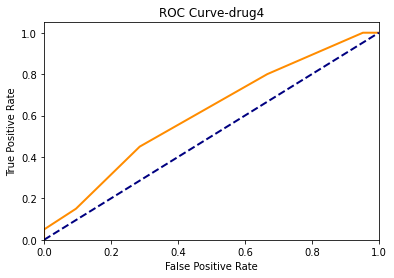

In [35]:
df = pd.DataFrame({'true_label': true_labels[3],
                   'pred_prob': score_drugs[3]})


#initial:
tpr = 0.0
fpr = np.linspace(0, 1, 101)




def ROC(y_true, y_predict):
    # Calculate TPR and FPR at different thresholds
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predict)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    
     
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve-drug4')
    plt.show()
    
ROC(df["true_label"],df["pred_prob"])

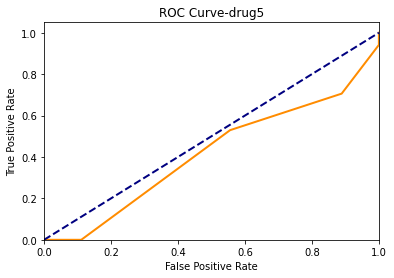

In [36]:
df = pd.DataFrame({'true_label': true_labels[4],
                   'pred_prob': score_drugs[4]})


#initial:
tpr = 0.0
fpr = np.linspace(0, 1, 101)




def ROC(y_true, y_predict):
    # Calculate TPR and FPR at different thresholds
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predict)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    
     
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve-drug5')
    plt.show()
    
ROC(df["true_label"],df["pred_prob"])

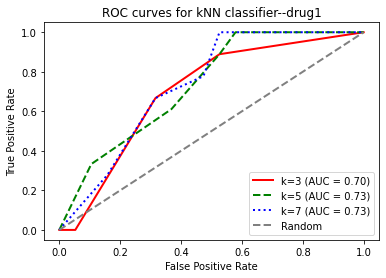

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

k_values = [3, 5, 7]
roc_curves = []
for k in k_values:
    if k==5:
        fpr, tpr, _ = roc_curve(true_labels[0], score_drugs[0])
    elif k==3:
        fpr, tpr, _ = roc_curve(true_labels[0], score_drugs2[0])
    else:
        fpr, tpr, _ = roc_curve(true_labels[0], score_drugs3[0])


    roc_curves.append((fpr, tpr))

fig, ax = plt.subplots()

colors = ['r', 'g', 'b']
linestyles = ['-', '--', ':']
labels = ['k=3', 'k=5', 'k=7']
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[i], linestyle=linestyles[i], lw=2,
            label=labels[i] + ' (AUC = %0.2f)' % roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random')

ax.set_title('ROC curves for kNN classifier--drug1')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.legend(loc="lower right")


plt.show()

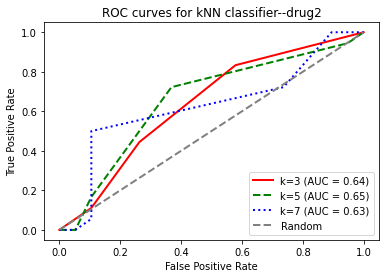

In [18]:

k_values = [3, 5, 7]
roc_curves = []
for k in k_values:

    if k==5:

        fpr, tpr, _ = roc_curve(true_labels[1], score_drugs[1])
    elif k==3:
        fpr, tpr, _ = roc_curve(true_labels[1], score_drugs2[1])
    else:
        fpr, tpr, _ = roc_curve(true_labels[1], score_drugs3[1])


    roc_curves.append((fpr, tpr))


fig, ax = plt.subplots()


colors = ['r', 'g', 'b']
linestyles = ['-', '--', ':']
labels = ['k=3', 'k=5', 'k=7']
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[i], linestyle=linestyles[i], lw=2,
            label=labels[i] + ' (AUC = %0.2f)' % roc_auc)


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random')


ax.set_title('ROC curves for kNN classifier--drug2')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.legend(loc="lower right")

plt.show()

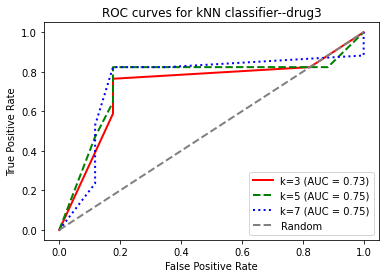

In [19]:

k_values = [3, 5, 7]
roc_curves = []
for k in k_values:

    if k==5:

        fpr, tpr, _ = roc_curve(true_labels[2], score_drugs[2])
    elif k==3:
        fpr, tpr, _ = roc_curve(true_labels[2], score_drugs2[2])
    else:
        fpr, tpr, _ = roc_curve(true_labels[2], score_drugs3[2])


    roc_curves.append((fpr, tpr))


fig, ax = plt.subplots()


colors = ['r', 'g', 'b']
linestyles = ['-', '--', ':']
labels = ['k=3', 'k=5', 'k=7']
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[i], linestyle=linestyles[i], lw=2,
            label=labels[i] + ' (AUC = %0.2f)' % roc_auc)


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random')


ax.set_title('ROC curves for kNN classifier--drug3')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.legend(loc="lower right")

plt.show()

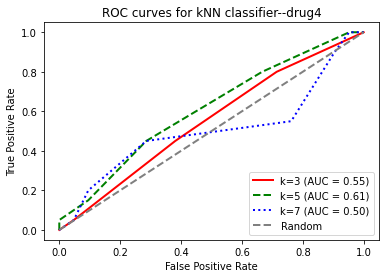

In [20]:

k_values = [3, 5, 7]
roc_curves = []
for k in k_values:

    if k==5:

        fpr, tpr, _ = roc_curve(true_labels[3], score_drugs[3])
    elif k==3:
        fpr, tpr, _ = roc_curve(true_labels[3], score_drugs2[3])
    else:
        fpr, tpr, _ = roc_curve(true_labels[3], score_drugs3[3])


    roc_curves.append((fpr, tpr))


fig, ax = plt.subplots()


colors = ['r', 'g', 'b']
linestyles = ['-', '--', ':']
labels = ['k=3', 'k=5', 'k=7']
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[i], linestyle=linestyles[i], lw=2,
            label=labels[i] + ' (AUC = %0.2f)' % roc_auc)


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random')


ax.set_title('ROC curves for kNN classifier--drug4')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.legend(loc="lower right")

plt.show()

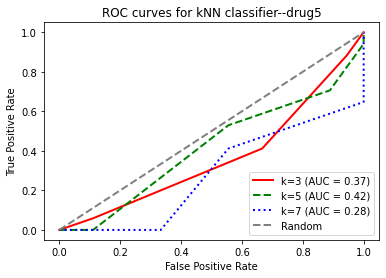

In [21]:

k_values = [3, 5, 7]
roc_curves = []
for k in k_values:

    if k==5:

        fpr, tpr, _ = roc_curve(true_labels[4], score_drugs[4])
    elif k==3:
        fpr, tpr, _ = roc_curve(true_labels[4], score_drugs2[4])
    else:
        fpr, tpr, _ = roc_curve(true_labels[4], score_drugs3[4])


    roc_curves.append((fpr, tpr))


fig, ax = plt.subplots()


colors = ['r', 'g', 'b']
linestyles = ['-', '--', ':']
labels = ['k=3', 'k=5', 'k=7']
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[i], linestyle=linestyles[i], lw=2,
            label=labels[i] + ' (AUC = %0.2f)' % roc_auc)


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random')


ax.set_title('ROC curves for kNN classifier--drug5')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.legend(loc="lower right")

plt.show()

In [22]:
#k=5 question 3(b)
new_score_drugs=[0]*5

    #  (corr, curr_cell_line) :
    #  [(0.932900785217343, 'UACC812'),
    #  (0.9300574550225753, 'HCC1428'),
    #  (0.9287809762976655, 'CAMA1'),
    #  (0.9286119024092296, 'MCF7'),
    #  (0.9283439521906872, 'BT474')]


for i in range(len(drugs)):
    # predict curr drug- score it
    new_score=[0]*len(drugs[i].keys())
    #curr: '184B5','600MPE','BT474','BT483',
    index=0
    for curr_cell in drugs[i].keys():
        for corr, curr_cell_line in get_topK(curr_cell,gene_express_profiles[i],k=5):
            if drugs[i][curr_cell_line]==1:
                new_score[index]+=(1*corr)
            else:
                new_score[index]+=(-1*corr)
        index+=1
        

    new_score_drugs[i]=[]
    for curr in new_score:
            new_score_drugs[i].append(curr/5)



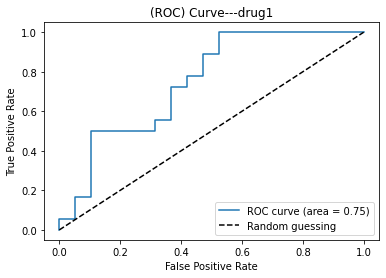

In [41]:
df_new = pd.DataFrame({'true_label': true_labels[0],
                   'pred_prob': new_score_drugs[0]})


fpr, tpr, threshold = roc_curve(df_new['true_label'], df_new['pred_prob'])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve---drug1')
plt.legend(loc="lower right")
plt.show()

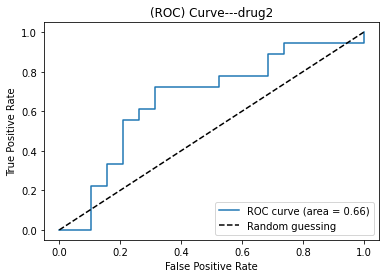

In [40]:
df_new = pd.DataFrame({'true_label': true_labels[1],
                   'pred_prob': new_score_drugs[1]})


fpr, tpr, threshold = roc_curve(df_new['true_label'], df_new['pred_prob'])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve---drug2')
plt.legend(loc="lower right")
plt.show()

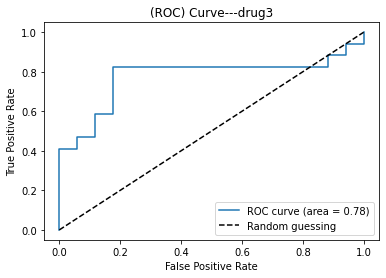

In [39]:
df_new = pd.DataFrame({'true_label': true_labels[2],
                   'pred_prob': new_score_drugs[2]})


fpr, tpr, threshold = roc_curve(df_new['true_label'], df_new['pred_prob'])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve---drug3')
plt.legend(loc="lower right")
plt.show()

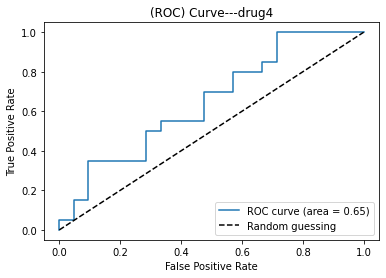

In [38]:
df_new = pd.DataFrame({'true_label': true_labels[3],
                   'pred_prob': new_score_drugs[3]})


fpr, tpr, threshold = roc_curve(df_new['true_label'], df_new['pred_prob'])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve---drug4')
plt.legend(loc="lower right")
plt.show()

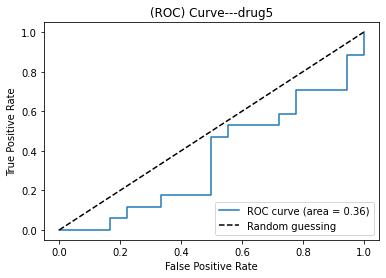

In [23]:
df_new = pd.DataFrame({'true_label': true_labels[4],
                   'pred_prob': new_score_drugs[4]})


fpr, tpr, threshold = roc_curve(df_new['true_label'], df_new['pred_prob'])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve---drug5')
plt.legend(loc="lower right")
plt.show()

In [24]:
gene_express_df.head()

HGNC_ID,C9orf152,ELMO2,RPS11,CREB3L1,PNMA1,MMP2,C10orf90,ERCC5,ZHX3,GPR98,...,GRIP2,GOLGA8B,GPLD1,RAB8A,RXFP2,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
184B5,3.613030,7.205940,10.476276,5.565989,7.664038,5.108659,4.128089,7.263226,5.742329,3.671584,...,6.164306,4.648155,3.741650,8.103385,3.035962,5.094983,8.347877,9.560331,8.014001,5.611784
600MPE,8.463736,7.959597,9.939852,9.835957,7.645439,4.611590,3.687597,7.450175,5.199320,5.755408,...,5.716731,5.082299,3.848673,9.345093,3.042711,5.838762,8.134302,9.230374,5.489988,5.135123
AU565,7.935823,8.073369,9.817430,5.696639,7.761882,4.765150,3.883901,7.204121,5.477589,6.198794,...,6.133836,4.844242,4.605217,9.343916,2.862658,5.259975,8.465382,8.702158,6.926434,5.309263
BT20,3.098928,8.164778,10.038500,4.972852,7.766212,4.657057,3.848230,7.758748,5.764572,3.560379,...,5.777977,5.019017,3.948915,9.465953,2.781718,4.581164,8.861059,6.829949,6.706568,5.232824
BT474,9.010836,8.120015,9.533423,8.155372,8.393242,4.584473,3.667176,6.542780,4.882232,4.810989,...,5.780276,5.151477,4.066432,8.841824,2.879156,6.680903,8.264550,9.895278,4.959705,5.212809


In [25]:
Everolimus_sens=Everolimus_sens.astype('int64')

In [26]:
Everolimus_sens.head()

184B5     0
600MPE    0
BT474     1
BT483     0
CAMA1     1
Name: Everolimus(mTOR), dtype: int64

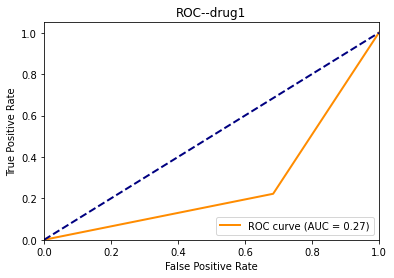

In [27]:
#extra credit --1

from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz



#drug1
data=features_drugs[0]
target= Everolimus_sens.tolist()


clf = DecisionTreeClassifier()

# perform LOOCV
loo = LeaveOneOut()
target_true = []
target_scores = []
for train_index, test_index in loo.split(data):
    data_train = np.array([list(data[i].values()) for i in train_index])
    target_train = [target[i] for i in train_index]
    data_test = np.array([list(data[i].values()) for i in test_index])
    target_test = target[test_index[0]]
    clf.fit(data_train, target_train)
    target_true.append(target_test)
    target_scores.append(clf.predict_proba(data_test)[:, 1][0])

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(target_true, target_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC--drug1')
plt.legend(loc="lower right")
plt.show()

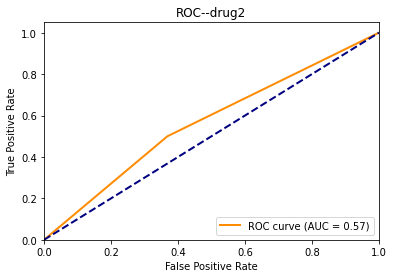

In [28]:
#extra credit --1


#drug2
data=features_drugs[1]
target= Disulfiram_sens.tolist()


clf = DecisionTreeClassifier()

# perform LOOCV
loo = LeaveOneOut()
target_true = []
target_scores = []
for train_index, test_index in loo.split(data):
    data_train = np.array([list(data[i].values()) for i in train_index])
    target_train = [target[i] for i in train_index]
    data_test = np.array([list(data[i].values()) for i in test_index])
    target_test = target[test_index[0]]
    clf.fit(data_train, target_train)
    target_true.append(target_test)
    target_scores.append(clf.predict_proba(data_test)[:, 1][0])

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(target_true, target_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC--drug2')
plt.legend(loc="lower right")
plt.show()

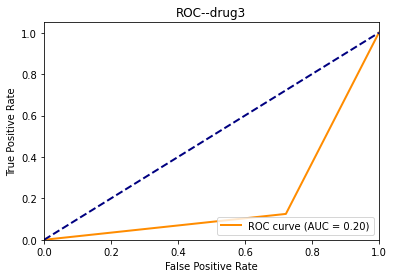

In [29]:
#extra credit --1


#drug3
data=features_drugs[2]
target= Disulfiram_sens.tolist()


clf = DecisionTreeClassifier()

# perform LOOCV
loo = LeaveOneOut()
target_true = []
target_scores = []
for train_index, test_index in loo.split(data):
    data_train = np.array([list(data[i].values()) for i in train_index])
    target_train = [target[i] for i in train_index]
    data_test = np.array([list(data[i].values()) for i in test_index])
    target_test = target[test_index[0]]
    clf.fit(data_train, target_train)
    target_true.append(target_test)
    target_scores.append(clf.predict_proba(data_test)[:, 1][0])

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(target_true, target_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC--drug3')
plt.legend(loc="lower right")
plt.show()

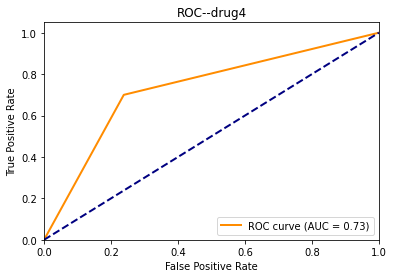

In [30]:
#extra credit --1


#drug4
data=features_drugs[3]
target= Mebendazole_sens.tolist()


clf = DecisionTreeClassifier()

# perform LOOCV
loo = LeaveOneOut()
target_true = []
target_scores = []
for train_index, test_index in loo.split(data):
    data_train = np.array([list(data[i].values()) for i in train_index])
    target_train = [target[i] for i in train_index]
    data_test = np.array([list(data[i].values()) for i in test_index])
    target_test = target[test_index[0]]
    clf.fit(data_train, target_train)
    target_true.append(target_test)
    target_scores.append(clf.predict_proba(data_test)[:, 1][0])

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(target_true, target_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC--drug4')
plt.legend(loc="lower right")
plt.show()

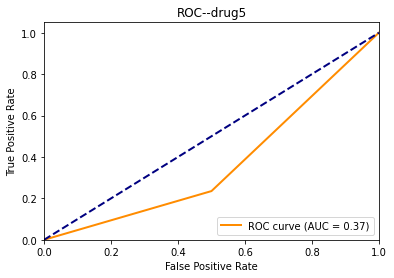

In [31]:
#extra credit --1


#drug5
data=features_drugs[4]
target= drug5_sens.tolist()


clf = DecisionTreeClassifier()

# perform LOOCV
loo = LeaveOneOut()
target_true = []
target_scores = []
for train_index, test_index in loo.split(data):
    data_train = np.array([list(data[i].values()) for i in train_index])
    target_train = [target[i] for i in train_index]
    data_test = np.array([list(data[i].values()) for i in test_index])
    target_test = target[test_index[0]]
    clf.fit(data_train, target_train)
    target_true.append(target_test)
    target_scores.append(clf.predict_proba(data_test)[:, 1][0])

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(target_true, target_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC--drug5')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

#Visualization
export_graphviz(clf,out_file="drug_tree.dot")
